# Simple Linear Regression

## Let's create my own Simple Linear Regressor

In [1]:
# Importing Libraries

import pandas as pd             # Import Numpy
import numpy as np              # Import Pandas
import matplotlib.pyplot as plt # Import Matplotlib.pyplot
import seaborn as sb            # Import Seaborn
sb.set()                        # Set Seaborn style

class SimpleLinearRegressor:
    
    ''' 
    Defines Simple Linear Regressor which finds 
    best fit line for the given data. 
    '''
    
    def __init__(self, error_metrics = True, 
                 visualization = False):
        '''
        Parameters :
        ------------
        
        X --> Independent Variable, type : pandas.core.series.Series
        y --> Dependent Variable  , type : pandas.core.series.Series  
        '''
        self.error_metrics = error_metrics  # Setting Error Metrics
        self.visualization = visualization  # Setting Visualization
    
    def validate_data(self, X, y):
        
        # Checking type of X
        if type(X) != pd.core.series.Series:
            raise TypeError('Independent column (X) must be the type :\
                            pandas.core.series.Series, \n \t\t\
                            but got type {}'. format(type(X)))
        
        # Checking type of y
        elif type(y) != pd.core.series.Series:
            raise TypeError('Dependent column (y) must be the type :\
                            pandas.core.series.Series, \n \t\t\
                            but got type {}'. format(type(y)))
        # Checking shape of X and y
        elif X.shape != y.shape:
            raise Exception('Shape does not match, got shape of {} and {}'.
                            format(X.shape, y.shape))
        else:
            pass
    
    
    def fit(self, X, y):
        
        ''' Fits the data to Multivariate Linear Regression '''
        
        # Validating Training Data
        self.validate_data(X, y)
        
        # Initializing Independent and Dependent columns
        self.X = X                      # Independent Column
        self.y = y                      # Dependent Column
        
        '''Step 1: Finding Mean value of Independent and Dependent column'''
        
        self._X_mean = self.X.mean()    # Average of Independent column
        self._y_mean = self.y.mean()    # Average of Dependent column
        
        '''Step 2: Finding difference from mean for each data 
                   on both Independent and Dependent column'''
        
        # Difference from mean of Independent column
        _X_mean_diff = self.X - self._X_mean
        # Difference from mean of Dependent column
        _y_mean_diff = self.y - self._y_mean 
        
        '''Step 3: Finding the Slope'''
        
        self.slope = ( _X_mean_diff * _y_mean_diff ).sum() / (_X_mean_diff ** 2).sum()
        
        '''Step 4: Finding the Intercept'''
        
        self.intercept = self._y_mean - (self.slope * self._X_mean)
        
        # Printing Error Metrics
        if self.error_metrics:
            self.rmse()
            self.r2_score()
            
        # Ploting Visualization
        if self.visualization:
            self.plot_regressor()
        
            
    def predict(self, X_test):
        ''' Predicts new test data '''        
        return self.slope * X_test + self.intercept 
    
    def plot_regressor(self):
        plt.figure(figsize=(10, 7))      # Setting Figure size
        plt.scatter(self.X, self.y)      # Scatter Plot on Train data
        plt.scatter(self._X_mean, 
                    self._y_mean, 
                    marker = '^', 
                    s=100, color = 'm')  # Plotting the average point  
        _y_pred = self.predict(self.X)   # Predicting the Train data
        plt.plot(self.X, _y_pred, 'g')   # Line plot on values predicted by our model
        plt.show()
        return
    
    def mse(self):
        ''' Returns Mean Squared Error '''
        _y_pred = self.predict(self.X)
        return ((self.y - _y_pred)**2).sum() / len(self.y)
    
    def rmse(self):
        rmse = self.mse()**0.5
        print('RMSE : {}'.format(rmse))
        return rmse
    
    def r2_score(self):
        '''
        It’s a statistical measure between 0 and 1 which calculates 
        how similar a regression line is to the data it’s fitted to. 
        If it’s a 1, the model 100% predicts the data variance; 
        if it’s a 0, the model predicts none of the variance.
        '''
        # Predicting Train Data
        _y_pred = self.predict(self.X)
        # Total Error from the model
        line_1_sum = ((self.y - _y_pred) ** 2).sum()
        # Total Error from horizontal line from y_mean
        line_2_sum = ((self.y - self._y_mean) ** 2).sum()
        
        # print(line_1_sum, line_2_sum)
        
        # R2 Score
        r2_score = (line_2_sum - line_1_sum) / line_2_sum
        
        print("R2 Score = {}".format(r2_score))
        return r2_score

# Own Dataset

### Using above created my own class

In [2]:
df = pd.DataFrame({'X' : [1,2,3,4,5], 'y' : [3,4,2,4,5]})
df

,X,y
0,1,3
1,2,4
2,3,2
3,4,4
4,5,5


In [3]:
own_regressor = SimpleLinearRegressor(visualization=True)

RMSE : 0.848528137423857
R2 Score = 0.30769230769230776


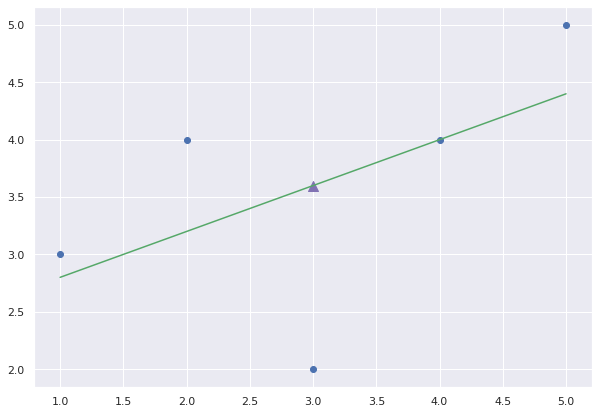

In [4]:
own_regressor.fit(df['X'], df['y'])

In [5]:
own_regressor.intercept

2.4

In [6]:
own_regressor.slope

0.4

### Using sklearn

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
X = df.iloc[:, [0]].values
y = df.iloc[:, 1].values

In [9]:
skl_regressor = LinearRegression()

In [10]:
skl_regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
skl_regressor.coef_

array([0.4])

In [12]:
skl_regressor.intercept_

2.4000000000000004

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y, skl_regressor.predict(X))

0.7200000000000002

In [14]:
r2_score(y, skl_regressor.predict(X))

0.3076923076923075

<br><br><br><br><br><br><br>

# Salary Dataset

### Using above created my own class

In [15]:
salary = pd.read_csv('Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [16]:
salary.shape

(30, 2)

In [17]:
own_salary_regressor = SimpleLinearRegressor(visualization=True)

RMSE : 5592.043608760662
R2 Score = 0.9569566641435084


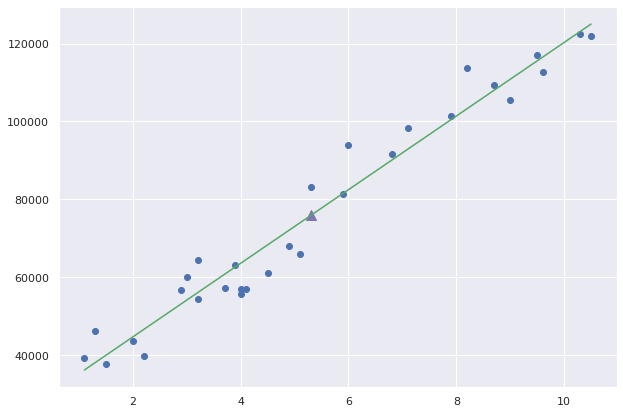

In [18]:
own_salary_regressor.fit(salary['YearsExperience'], salary['Salary'])

### Using sklearn

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
X = salary.iloc[:, [0]].values
y = salary.iloc[:, 1].values

skl_salary_regressor = LinearRegression()
skl_salary_regressor.fit(X, y)

skl_salary_regressor.coef_, skl_salary_regressor.intercept_

(array([9449.96232146]), 25792.200198668717)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y, skl_salary_regressor.predict(X))

31270951.722280957

In [22]:
r2_score(y, skl_salary_regressor.predict(X))

0.9569566641435086

<br><br><br><br><br><br><br>

# Height - Weight dataset

In [23]:
hw = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
hw = hw[hw['Gender'] == 'Male']
hw.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5


### Using above created my own class

RMSE : 31.756853390023103
R2 Score = 0.0006829275267121801


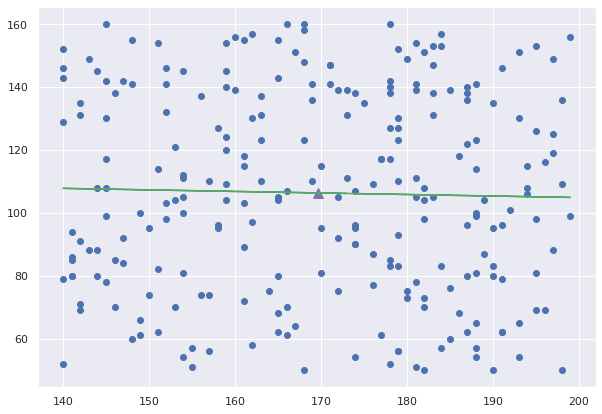

In [24]:
own_weight_regressor = SimpleLinearRegressor(visualization=True)
own_weight_regressor.fit(hw['Height'], hw['Weight'])

### Using sklearn

In [25]:
X = hw.iloc[:, [1]].values
y = hw.iloc[:, 2].values

from sklearn.linear_model import LinearRegression
skl_weight_regressor = LinearRegression()
skl_weight_regressor.fit(X, y)
skl_weight_regressor.coef_, skl_weight_regressor.intercept_

(array([-0.04874589]), 114.58397655987221)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y, skl_weight_regressor.predict(X))

1008.4977372354218

In [27]:
r2_score(y, skl_weight_regressor.predict(X))

0.0006829275267122847